# Técnica de Medias Móviles

In [ ]:
#Vamos a importar nuestras librerias
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [12]:
#Definimos nuestro intervalo de tiempo
startdate = date.datetime(2010,1,1) 
enddate = date.datetime(2019,11,1)
#IPC Mexico
tick = '^MXX'
ipc = pdr.get_data_yahoo(tick,start = startdate, end = enddate) #Datos de Yahoo Finance

In [13]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,32758.529297,32120.740234,32120.740234,32758.529297,136257800.0,32758.529297
2010-01-05,33073.710938,32628.240234,32729.300781,32732.759766,165541900.0,32732.759766
2010-01-06,32922.121094,32639.439453,32730.419922,32830.160156,126000100.0,32830.160156
2010-01-07,33069.781250,32670.980469,32830.218750,33064.570312,123563200.0,33064.570312
2010-01-08,33080.050781,32779.660156,33067.570312,32892.039062,109516900.0,32892.039062


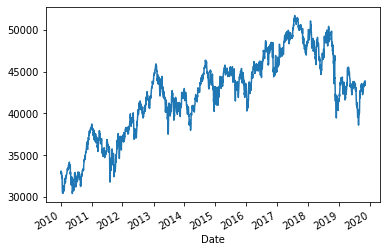

In [27]:
%matplotlib inline
ipc.Close.plot() #Graficamos el cierre del precio

## Media móvil Simple
La estrategia más simple de todas es una Media Móvil Simple. Los operadores tratarán de situarse en posiciones cortas cuando caiga el precio por debajo de la MM, y situarse en posiciones largas si sube por encima de la misma. La ventaja de esta estrategia es que nunca nos perdamos una tendencia; el inconveniente es que en los mercados en rango veremos que asumimos posiciones que se eliminan muy rápido. (Lo explicare mejor cuando grafiquemos)


$$MA_t = \frac{p_{t-n+1} + p_{t-n+2} + ... + p_t}{n} = \sum_{i=t-n+1}^{t} p_{i,n} \leqslant t$$

In [19]:
#Vamos a definir la función y explicaremos mejor como funciona
#"n" es el número de días de nuestro intervalo de cada MA y "df" es el DataFrame
def MA(df,n):
    MA = pd.Series(pd.Series.rolling(df['Close'],n).mean(),name = 'MA_' + str(n))
    #El metodo rolling va a recibir nuestro precio de cierre y nos va a crear una serie te tiempo
    df = df.join(MA)
    return df

In [20]:
#Definiremos dos Medias Móviles cada una con diferentes intervalos de tiempo. La Media Móvil 
#"rápida" será a 50 días (tomaremos los datos y sacaremos su promedio) y la "lenta" será a 20

ma_50 = MA(ipc,50)
ma_200 = MA(ma_50,200)

In [22]:
ma_200.head()

,High,Low,Open,Close,Volume,Adj Close,MA_50,MA_200
Date,,,,,,,,
2010-01-04,32758.529297,32120.740234,32120.740234,32758.529297,136257800.0,32758.529297,NaN,NaN
2010-01-05,33073.710938,32628.240234,32729.300781,32732.759766,165541900.0,32732.759766,NaN,NaN
2010-01-06,32922.121094,32639.439453,32730.419922,32830.160156,126000100.0,32830.160156,NaN,NaN
2010-01-07,33069.781250,32670.980469,32830.218750,33064.570312,123563200.0,33064.570312,NaN,NaN
2010-01-08,33080.050781,32779.660156,33067.570312,32892.039062,109516900.0,32892.039062,NaN,NaN


In [23]:
df = ma_200[['Close','MA_50','MA_200']] #Sólo graficaremos estas tres variables

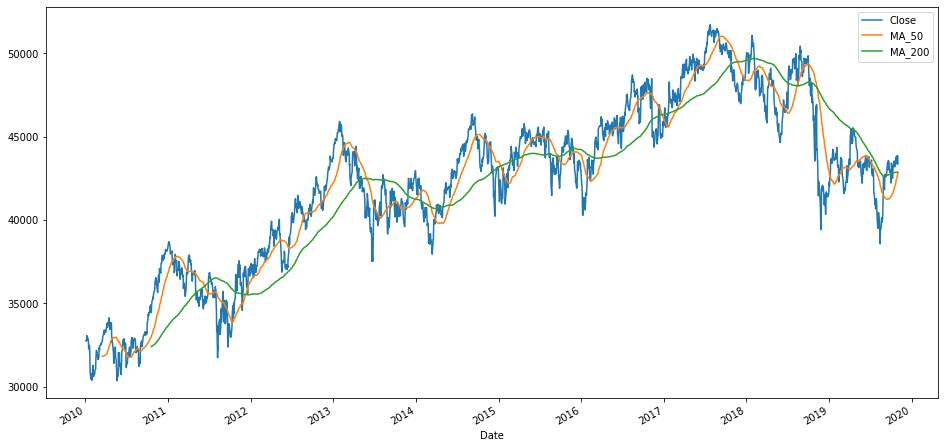

In [24]:
df.plot(figsize = (16,8))

Aqui podemos ver que cuando la MA a 50 días cruza de arriba hacia abajo la MA a 200 días tendrémos que entrar en corto. Y cuando la MA_50 cruza de abajo hacia arriba a la MA_200 entramos en largo. 

## Media Móvil Exponencial

Otra manera común para asignar media móviles en estadística consiste en asignar una ponderación diferente a cada precio, favoreciendo los precios más recientes otorgándoles mayores pesos que a los precios más antiguos. Este es e modo en que la media móvil exponencial funciona, con el peso otorgado a cada precio reduciéndose exponencialmente según se retrocede en el tiempo. (Esta es mejor porque responde más rápido a los cambios en el precio)

In [28]:
def EMA(df,n):
    EMA = pd.Series(pd.Series.ewm(df['Close'],span = n,min_periods = n - 1, adjust = False).mean(),
                    name = 'EMA_' + str(n))
    df = df.join(EMA)
    return df

In [34]:
df = EMA(ipc, 50)
df2 = MA(df, 50)
df2 = df2[['Close','MA_50','EMA_50']]

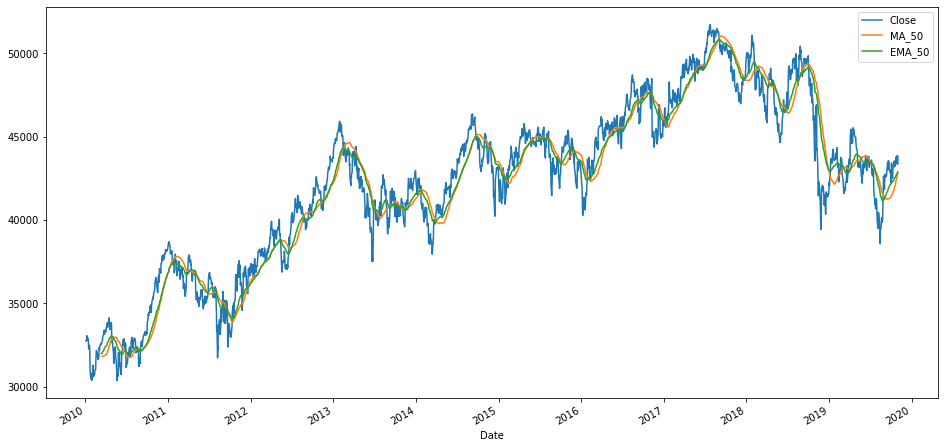

In [35]:
#Vamos a comparar las dos Medias Móviles para ver la diferencia.
df2.plot(figsize = (16,8))